In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
import os

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/electricity_train.csv', sep = ',', header = 0 )
data

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.425556,6,0.723404,0.076258,0.311366,0.003467,0.422915,0.414912,1
1,0.867351,7,0.808511,0.028131,0.299018,0.001838,0.325738,0.832018,0
2,0.031680,1,0.723404,0.055242,0.398691,0.003467,0.422915,0.414912,0
3,0.867793,3,1.000000,0.028822,0.396162,0.001014,0.394873,0.639474,0
4,0.880536,4,0.978723,0.040741,0.468908,0.002655,0.425427,0.630702,1
...,...,...,...,...,...,...,...,...,...
36244,0.447281,2,0.723404,0.087096,0.845879,0.006061,0.687209,0.327632,1
36245,0.429583,7,0.425532,0.058034,0.372657,0.003467,0.422915,0.414912,0
36246,0.013053,5,0.468085,0.041732,0.558465,0.003467,0.422915,0.414912,0
36247,0.889739,3,0.872340,0.078179,0.730586,0.005393,0.599171,0.476754,1


In [ ]:
data.describe()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
count,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000
mean,0.498293,4.006566,0.500560,0.057828,0.425939,0.003455,0.423024,0.500243,0.424536
std,0.339907,1.993551,0.294998,0.039052,0.163390,0.010175,0.120600,0.153098,0.494279
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031945,2.000000,0.255319,0.035187,0.309729,0.002283,0.373382,0.414912,0.000000
50%,0.456263,4.000000,0.510638,0.048787,0.444213,0.003467,0.422915,0.414912,0.000000
75%,0.880492,6.000000,0.765957,0.074457,0.536745,0.003467,0.468669,0.605263,1.000000
max,1.000000,7.000000,1.000000,1.000000,0.980809,1.000000,1.000000,0.959211,1.000000


In [ ]:
import numpy as np
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36249 entries, 0 to 36248
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       36249 non-null  float64
 1   day        36249 non-null  int64  
 2   period     36249 non-null  float64
 3   nswprice   36249 non-null  float64
 4   nswdemand  36249 non-null  float64
 5   vicprice   36249 non-null  float64
 6   vicdemand  36249 non-null  float64
 7   transfer   36249 non-null  float64
 8   class      36249 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 2.5 MB


### Убедимся в отсутствии пропуск и введем долю объектов 1 класса

In [ ]:
print('class_1_fraction', data['class'].sum()/ len(data))

class_1_fraction 0.4245358492648073


<Axes: >

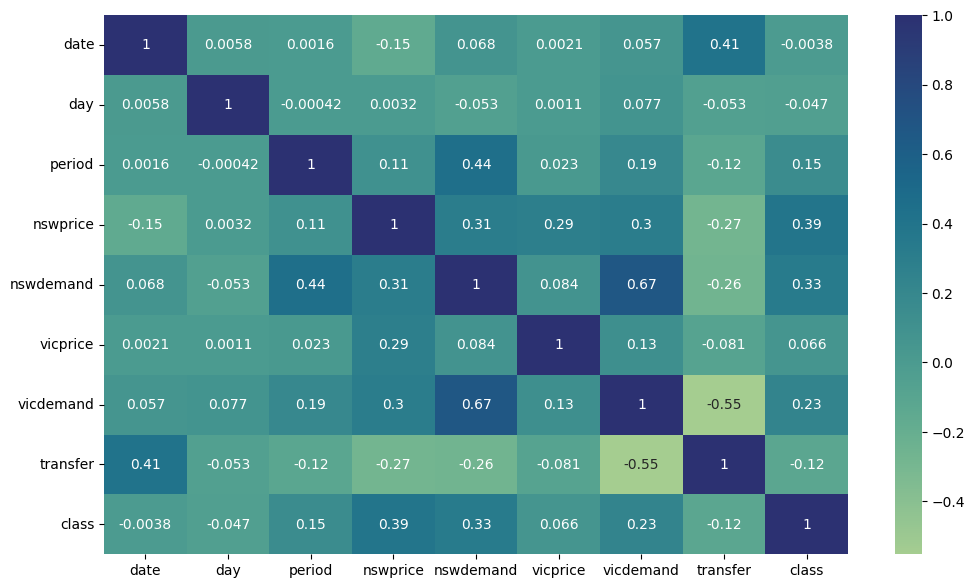

In [ ]:
# Построим матрицу корреляций
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True, cmap='crest')

In [ ]:
#Выполним вспомогательную работу для наибольшего определения признаков
def get_redudant_pairs(data):
  pairs_to_drop = set()
  cols = data.columns
  for i in range(0, data.shape[1]):
    for j in range(0, i+1):
      pairs_to_drop.add((cols[i], cols[j]))
  return pairs_to_drop

def get_top_abs_correlation(data, n=5):
  au_corr = data.corr().abs().unstack()
  labels_to_drop = get_redudant_pairs(data)
  au_corr = au_corr.drop(labels_to_drop).sort_values(ascending=False)
  return au_corr[0:n]

print('Mosr correlation pair: ', get_top_abs_correlation(data, 1).index[0])

Mosr correlation pair:  ('nswdemand', 'vicdemand')


In [ ]:
# Построим гистограмму распределения признаков
if not os.path.exists('imgs'):
  os.makedirs('imgs')
feature = 'day'
hists_dict = {}
for feature in data.drop('class', axis=1).columns:
  fig = figure(figsize=(5,5), dpi=200)
  plt.hist(data[feature], bins=20)
  plt.axis('off')
  fig.tight_layout()
  # plt.show()

  f_name = 'electrecity_' + feature + '_hist.png'
  f_path = 'imgs/' + f_name
  hists_dict[feature] = f_name
  plt.savefig(f_path)
  plt.clf()
  plt.close()

print(hists_dict)



{'date': 'electrecity_date_hist.png', 'day': 'electrecity_day_hist.png', 'period': 'electrecity_period_hist.png', 'nswprice': 'electrecity_nswprice_hist.png', 'nswdemand': 'electrecity_nswdemand_hist.png', 'vicprice': 'electrecity_vicprice_hist.png', 'vicdemand': 'electrecity_vicdemand_hist.png', 'transfer': 'electrecity_transfer_hist.png'}


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'period'}>],
       [<Axes: title={'center': 'nswprice'}>,
        <Axes: title={'center': 'nswdemand'}>,
        <Axes: title={'center': 'vicprice'}>],
       [<Axes: title={'center': 'vicdemand'}>,
        <Axes: title={'center': 'transfer'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

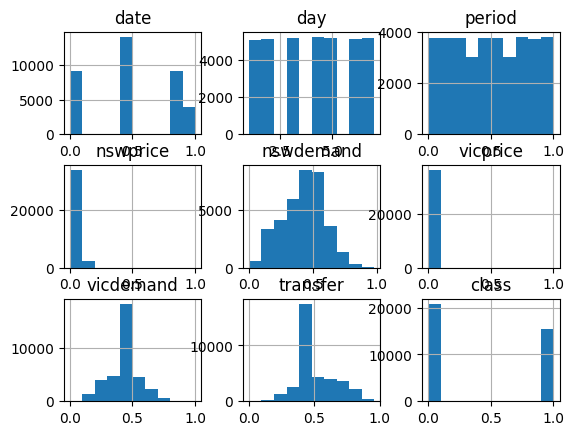

In [ ]:
data.hist()

In [ ]:
# Разобъем данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
random_state = 17
X_train, X_test, y_train, y_test = train_test_split(data.drop(['class'], axis=1),data['class'] , test_size=0.2, random_state= random_state)

print('Size train',len(X_train) )
print('Size test: ', len(X_test))

Size train 28999
Size test:  7250


### Подготовим вспомогательные функции, которые будут помогать нам выдавать результат

In [ ]:
# Подготавливаем метрики для оценки
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def accuracy_and_conf_matrix(model, y_true, inputs):
  y_pred = model.predict(inputs)
  accuracy = accuracy_score(y_true,y_pred)
  conf_matrix = confusion_matrix(y_true, y_pred)
  return accuracy, conf_matrix

In [ ]:
from sklearn.metrics import classification_report

def class_report(model, y_true, inputs):
  y_pred = model.predict(inputs)
  report = classification_report(y_true, y_pred)
  return report

In [ ]:
### Random forest classifier
from sklearn.ensemble import  RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=random_state)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [ ]:
# Построим classification report
accuracy, conf_matrix = accuracy_and_conf_matrix(forest_clf, y_train, X_train)
print('forest_clf_train_accuracy', accuracy)
print('\n\n', class_report(forest_clf, y_train, X_train))

forest_clf_train_accuracy 1.0


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16712
           1       1.00      1.00      1.00     12287

    accuracy                           1.00     28999
   macro avg       1.00      1.00      1.00     28999
weighted avg       1.00      1.00      1.00     28999



In [ ]:
# Исправим переобучение, добавим GridSearch с кроссвалидацией
from sklearn.model_selection import GridSearchCV

params_grid = {'n_estimators': [100,300,500],
  'max_leaf_nodes': list(range(6,10)),
  'min_samples_leaf': [1,2,3]}

grid_search = GridSearchCV(RandomForestClassifier(
    bootstrap=False,
    class_weight='balanced',
    n_jobs=-1,
    max_features='sqrt',
    random_state=17),
    params_grid,
    verbose=4,
    cv=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.775 total time=   1.6s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.779 total time=   1.2s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.771 total time=   1.2s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.772 total time=   3.5s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.777 total time=   5.0s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.771 total time=   4.4s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.772 total time=   5.6s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.778 total time=  10.2s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.771 total time=   6.3s
[CV 1/3] END max_leaf_nodes=6

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight='balanced',
                                              n_jobs=-1, random_state=17),
             param_grid={'max_leaf_nodes': [6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             verbose=4)

In [ ]:
print('Grid_search CV params: ', grid_search.best_params_ )

Grid_search CV params:  {'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'n_estimators': 100}


In [ ]:
# Построим classification_report полученной модели на тренировочных данных
forest_best = grid_search.best_estimator_
accuracy, conf_matrix = accuracy_and_conf_matrix(forest_best, y_train, X_train)
print('Forest best train accuracy ', accuracy)
print('\n\n', conf_matrix)

Forest best train accuracy  0.790785889168592


 [[14458  2254]
 [ 3813  8474]]


In [ ]:
# Построим classification_report полученной модели на тестовых данных
forest_best = grid_search.best_estimator_
accuracy, conf_matrix = accuracy_and_conf_matrix(forest_best, y_test, X_test)
print('Forest best train accuracy ', accuracy)
print('\n\n', conf_matrix)

Forest best train accuracy  0.7924137931034483


 [[3585  563]
 [ 942 2160]]


### Посмотрим важность признаков при классификации(обратная задача)

In [ ]:
print('Most valuable forest best feature', pd.DataFrame(forest_best.feature_importances_, columns=['Feature Importance'], index=X_train.columns).sort_values(by='Feature Importance', ascending=False).index[0])


Most valuable forest best feature nswprice


### Voting Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier


In [ ]:
log_classifier = LogisticRegression(solver = 'liblinear', random_state = random_state)
sv_classifier = SVC(random_state=random_state)
sgd_classifier = SGDClassifier(random_state = random_state)

In [ ]:
vot_classifier = VotingClassifier(
    estimators=[
        ('log_reg',log_classifier ),
        ('svc',sv_classifier ),
        ('sgd', sgd_classifier)]
)

vot_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(random_state=17,
                                                 solver='liblinear')),
                             ('svc', SVC(random_state=17)),
                             ('sgd', SGDClassifier(random_state=17))])

In [ ]:
# Вычислим мощность на тренировочных данных
accuracy , conf_matrix = accuracy_and_conf_matrix(vot_classifier, y_train, X_train)
print('Voting_classifier_train_accuracy: ',accuracy)
print('\n\n', conf_matrix)

Voting_classifier_train_accuracy:  0.7456808855477776


 [[15373  1339]
 [ 6036  6251]]


In [ ]:
# Вычислим мощность на тестовых данных
accuracy , conf_matrix = accuracy_and_conf_matrix(vot_classifier, y_test, X_test)
print('Voting_classifier_train_accuracy: ',accuracy)
print('\n\n', conf_matrix)

Voting_classifier_train_accuracy:  0.7507586206896552


 [[3827  321]
 [1486 1616]]


### Bagging Classifier

In [ ]:
#Обучим модель с гиперматрами на тренировочных данных
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_classifier = BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5,
    max_features=0.5,
    bootstrap=False,
  random_state=17)

bag_classifier.fit(X_train, y_train)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(class_weight='balanced'),
                  max_features=0.5, max_samples=0.5, random_state=17)

In [ ]:
# Вычислим мощность на тренировочных данных
accuracy,conf_matix = accuracy_and_conf_matrix(bag_classifier, y_train, X_train)
print('Bag_classifier_train_accuracy: ',accuracy)
print('\n\n', conf_matrix)

Bag_classifier_train_accuracy:  0.9817579916548846


 [[3827  321]
 [1486 1616]]


In [ ]:
# Вычислим мощность на тестовых данных
accuracy , conf_matrix = accuracy_and_conf_matrix(bag_classifier, y_test, X_test)
print('Bag_classifier_train_accuracy:  ',accuracy)
print('\n\n', conf_matrix)

Bag_classifier_train_accuracy:   0.8856551724137931


 [[3858  290]
 [ 539 2563]]


### GradientBosting Classifier
Он создает несколько объектов класса(несколько моделей)б они выстраиваются в цепочку так, чтобы каждый следующий пытался исправить ошибки предыдущего

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.8,
    random_state=random_state,
    max_depth=2
)

grad_boost_clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.8, max_depth=2, n_estimators=500,
                           random_state=17)

In [ ]:
# Вычислим мощность на тестовых данных
accuracy, conf_matrix = accuracy_and_conf_matrix(grad_boost_clf,  y_test, X_test)
print('Bag_classifier_train_accuracy:  ',accuracy)
print('\n\n', conf_matrix)

Bag_classifier_train_accuracy:   0.9016551724137931


 [[3830  318]
 [ 395 2707]]


In [ ]:
# Вычислим мощность на тренировочных данных
accuracy,conf_matix = accuracy_and_conf_matrix(grad_boost_clf, y_train, X_train)
print('Bag_classifier_train_accuracy: ',accuracy)
print('\n\n', conf_matrix)

Bag_classifier_train_accuracy:  0.9308941687644402


 [[3830  318]
 [ 395 2707]]


### Ada boost classifier
Работаем похожим образом, но не пытаемся исправить ошибку у предыдущих моделей

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_boost_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
    n_estimators=300,
    learning_rate=0.5,
    random_state=random_state)

ada_boost_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=3),
                   learning_rate=0.5, n_estimators=300, random_state=17)

In [ ]:
# Вычислим мощность на тренировочных данных
accuracy,conf_matix = accuracy_and_conf_matrix(ada_boost_clf, y_train, X_train)
print('Bag_classifier_train_accuracy: ',accuracy)
print('\n\n', conf_matrix)

Bag_classifier_train_accuracy:  0.9396530914859134


 [[3830  318]
 [ 395 2707]]


In [ ]:
# Вычислим мощность на тестовых данных
accuracy, conf_matrix = accuracy_and_conf_matrix(ada_boost_clf,  y_test, X_test)
print('Bag_classifier_train_accuracy:  ',accuracy)
print('\n\n', conf_matrix)

Bag_classifier_train_accuracy:   0.9019310344827586


 [[3735  413]
 [ 298 2804]]


### Stacking Classifier
Обучает несколько объектов класса(несколько моделей) во всем наборе данныхЮ а после обучает отдельный классификатор на метданных - ответах, полученных обученными ранее моделями

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

base_estimator = [
    ('rand', RandomForestClassifier(random_state=17)),
    ('svc', SVC(random_state=random_state))]

final_estimator = LogisticRegression(random_state = 17)
clf_rep = StackingClassifier(estimators = base_estimator, final_estimator=final_estimator)

clf_rep.fit(X_train, y_train)

StackingClassifier(estimators=[('rand',
                                RandomForestClassifier(random_state=17)),
                               ('svc', SVC(random_state=17))],
                   final_estimator=LogisticRegression(random_state=17))

In [ ]:
#vicdemand, vicprice
# Вычислим мощность на тренировочных данных
accuracy,conf_matix = accuracy_and_conf_matrix(clf_rep, y_train, X_train)
print('Bag_classifier_train_accuracy: ',accuracy)
print('\n\n', conf_matrix)

Bag_classifier_train_accuracy:  0.9997586123659437


 [[3799  349]
 [ 375 2727]]


In [ ]:
# Вычислим мощность на тестовых данных
accuracy, conf_matrix = accuracy_and_conf_matrix(clf_rep,  y_test, X_test)
print('Bag_classifier_train_accuracy:  ',accuracy)
print('\n\n', conf_matrix)

Bag_classifier_train_accuracy:   0.9022068965517241


 [[3813  335]
 [ 374 2728]]
